In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
pwd = os.getcwd()

In [7]:
df = pd.read_csv(os.path.basename(pwd+'/Eluvio_DS_Challenge.csv'))

In [9]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [13]:
df.author.value_counts()[:10]

davidreiss666    8897
anutensil        5730
DoremusJessup    5037
maxwellhill      4023
igeldard         4013
readerseven      3170
twolf1           2923
madam1           2658
nimobo           2564
madazzahatter    2503
Name: author, dtype: int64

In [27]:
df.category.value_counts()
df.down_votes.value_counts()

0    509236
Name: down_votes, dtype: int64

### Category is worldnews and down_votes is zero for all the columns, we can remove these 2 column as these will have no statistical significance

In [28]:
df.drop(['category','down_votes'], axis=1, inplace=True)

In [21]:
df["Month"] = list(map(lambda x: datetime.strptime(x,'%Y-%m-%d').strftime('%B'), df['date_created']))
df["Year"] = list(map(lambda x: datetime.strptime(x,'%Y-%m-%d').strftime('%Y'), df['date_created']))

,time_created,date_created,up_votes,down_votes,title,over_18,author,Month,Year
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,January,2008
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,January,2008
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,January,2008
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,January,2008
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,January,2008


In [29]:
df.drop(['time_created','date_created'], axis=1, inplace=True)

2015    94621
2014    92030
2013    88231
2016    81892
2012    42643
2011    38886
2009    25115
2010    23313
2008    22505
Name: Year, dtype: int64

In [30]:
df.head()

,up_votes,title,over_18,author,Month,Year
0,3,Scores killed in Pakistan clashes,False,polar,January,2008
1,2,Japan resumes refuelling mission,False,polar,January,2008
2,3,US presses Egypt on Gaza border,False,polar,January,2008
3,1,Jump-start economy: Give health care to all,False,fadi420,January,2008
4,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,January,2008


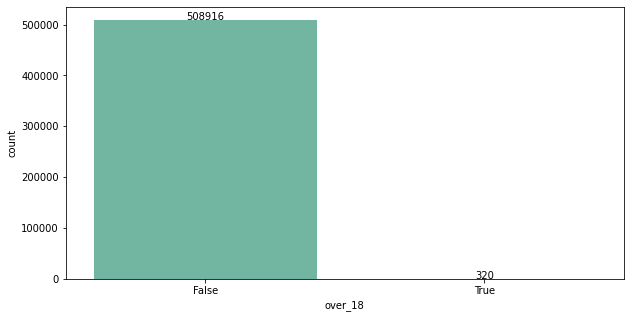

In [35]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='over_18', data=df,palette="Set2")
graph.set_xticklabels(graph.get_xticklabels())

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")